In [33]:
from os import chdir as cd
pathin = '/Users/ethan/Documents/GitHub/CLA_2019/Coding/Friday Exercises/Data/Brown_MOT/Adam'
file = 'adam01.cha'

In [34]:
cd(pathin)
with open(file, 'r') as f:
    text = f.read()
print(text[0:100])

big drum
horse
who is that
those are checkers
two checkers  yes
play checkers
big horn
get over  Mom


In [35]:
# divide the string "text" into a list, by splitting it on every newline ("\n")
text = text.split('\n')
print(text[0:10])

['big drum', 'horse', 'who is that', 'those are checkers', 'two checkers  yes', 'play checkers', 'big horn', 'get over  Mommy', 'shadow', 'I like it']


In [36]:
# set up an empty list
lu = []

# loop through e
for utterance in text:
    words = utterance.split()
    num_words = len(words)
    LU.append(num_words)

In [39]:
print(text[0:5])
print(lu[0:5])

['big drum', 'horse', 'who is that', 'those are checkers', 'two checkers  yes']
[]


In [38]:
# find mean length of utterance (in words)
mlu = sum(lu)/len(lu)
mlu

ZeroDivisionError: division by zero

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
utterances = list(range(1, len(LU)+1, 1))
df = pd.DataFrame(
    {'utterance': utterances,
     'LU': lu
    }) 

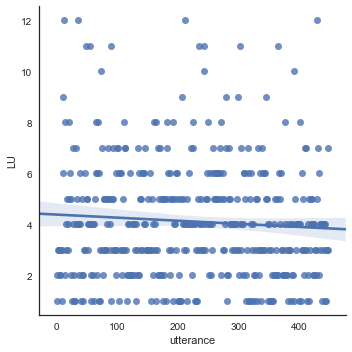

In [32]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("white")
sns.lmplot(x = "utterance", y= "LU", data = df)